# Regressão - Life Expectancy (WHO)

## Carregando as bibliotecas

In [154]:
import pandas            as pd
import matplotlib.pyplot as plt
import numpy             as np
import seaborn           as sns

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor

## Carregando o dataset

In [155]:
lifeExpectancy = pd.read_csv(
    "../dataset/life-expectancy/Life Expectancy Data.csv",
)

In [156]:
lifeExpectancy.shape

(2938, 22)

In [157]:
lifeExpectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Preprocessamento do dataset

### Verificando a existência de linhas com colunas vazias

In [158]:
print(lifeExpectancy.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


Removendo linhas com colunas vazias

In [159]:
lifeExpectancy = lifeExpectancy.dropna()

print(lifeExpectancy.isnull().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


### Lidando com outliers

> Optei manter valores extremos, sem considerá-los outliers, pois eles refletem situações reais e importantes na saúde pública de alguns países, como guerras ou epidemias, e sua remoção poderia ocultar padrões relevantes na análise.

### Removendo atributos muito semelhantes

In [160]:
lifeExpectancy = lifeExpectancy.drop(columns=["infant deaths"," thinness 5-9 years"])

lifeExpectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,0.454,9.5


> Removi _infant deaths_ por estar contido _under-five deaths_ e _thinnes 5-9 years_ por estar contido em _thinness 1-19 years_

### Formatando os nomes das colunas


In [161]:
print(lifeExpectancy.columns.tolist())

['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', 'Income composition of resources', 'Schooling']


Removendo espaços em branco

In [162]:
lifeExpectancy.columns = lifeExpectancy.columns.str.strip()
print(lifeExpectancy.columns.tolist())

['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'Income composition of resources', 'Schooling']


## Analise Exploratória

### Verificando os tipos de dado de cada coluna

In [163]:
lifeExpectancy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   Alcohol                          1649 non-null   float64
 6   percentage expenditure           1649 non-null   float64
 7   Hepatitis B                      1649 non-null   float64
 8   Measles                          1649 non-null   int64  
 9   BMI                              1649 non-null   float64
 10  under-five deaths                1649 non-null   int64  
 11  Polio                            1649 non-null   float64
 12  Total expenditure        

### Obtendo dados estatísticos do dataset

In [164]:
lifeExpectancy.describe()

,Year,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,0.631551,12.119891
std,4.087711,8.796834,125.310417,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,0.936000,20.700000


### Análise de dados por país:

#### Países com maior e menor espectativa de vida

In [165]:
df_sorted = lifeExpectancy.sort_values(by='Life expectancy', ascending=True)

bottom_10_lifeExpectancy = df_sorted.drop_duplicates(subset=['Country']).head(10)
top_10_lifeExpectancy = df_sorted.drop_duplicates(subset=['Country']).tail(10)

Plotando gráficos de expectativa de vida dos países

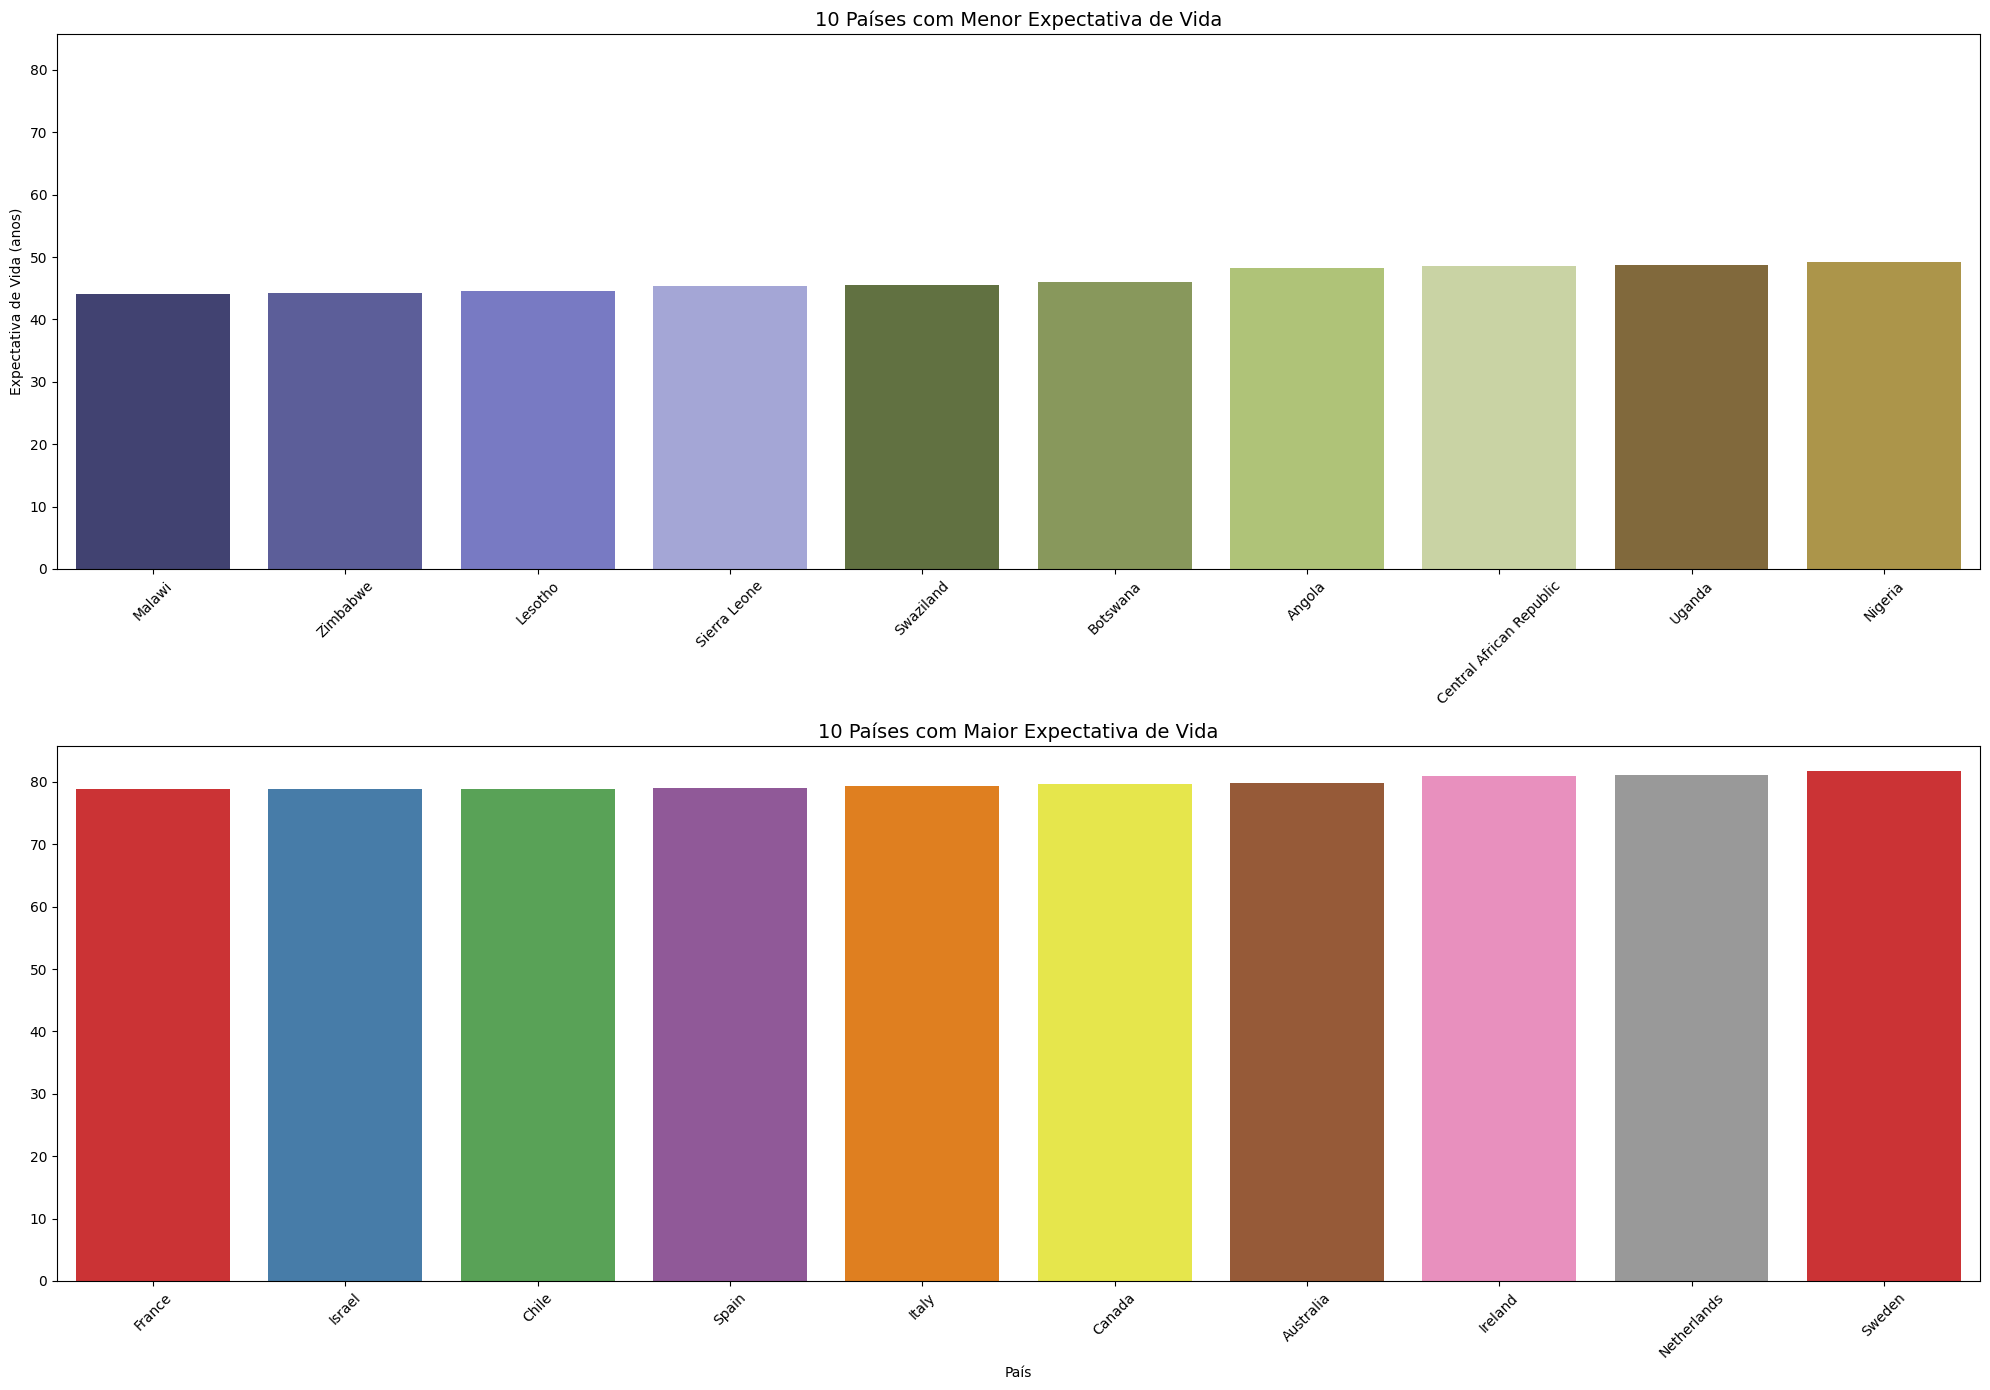

In [166]:
fig, axes = plt.subplots(2, 1, figsize=(20, 14), sharex=False, sharey=True)

# Gráfico 1 - Bottom 15 países
sns.barplot(
    data=bottom_10_lifeExpectancy,
    x='Country',
    y='Life expectancy',
    palette='tab20b',
    hue='Country',
    dodge=False,
    legend=False,
    ax=axes[0]
)
axes[0].set_title('10 Países com Menor Expectativa de Vida', fontsize=14)
axes[0].set_xlabel('')
axes[0].set_ylabel('Expectativa de Vida (anos)')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico 2 - Top 15 países
sns.barplot(
    data=top_10_lifeExpectancy,
    x='Country',
    y='Life expectancy',
    palette='Set1',
    hue='Country',
    dodge=False,
    legend=False,
    ax=axes[1]
)
axes[1].set_title('10 Países com Maior Expectativa de Vida', fontsize=14)
axes[1].set_xlabel('País')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Plotando a matriz de correlação dos dados

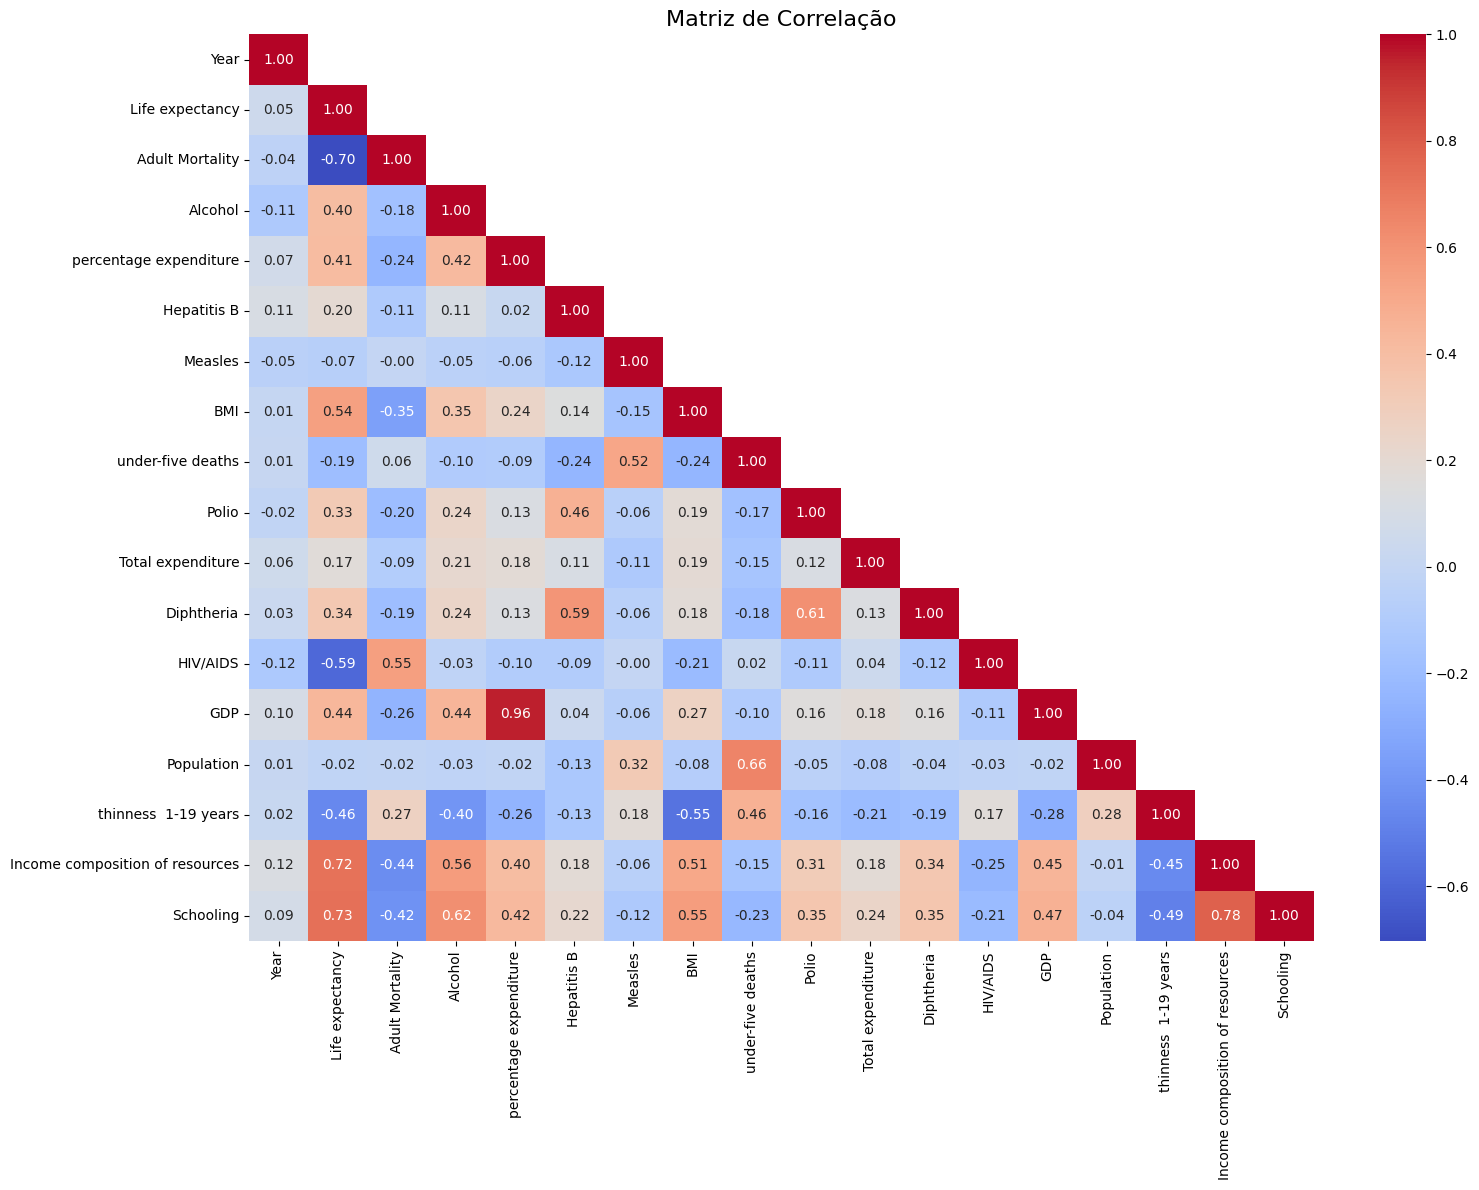

In [167]:
numeric_columns = lifeExpectancy.select_dtypes(include=[np.number]).columns

correlation_matrix = lifeExpectancy[numeric_columns].corr()

plt.figure(figsize=(16, 12))

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    cmap = "coolwarm",
    fmt=".2f",
)

plt.title("Matriz de Correlação", fontsize=16)
plt.tight_layout()
plt.show()

Essa matriz de correlação nos dá algumas informações muito relevantes, tais como:

#### **Correlações Fortes** ($0.7 \le |r| \le 0.9$)

| Variável 1                      | Variável 2                        | Correlação |
|--------------------------------|-----------------------------------|------------|
| GDP                            | Percentage Expenditure            | 0.96       |
| Income composition of resources| Schooling                         | 0.78       |
| Life expectancy                | Schooling                         | 0.75       |
| Life expectancy                | Income composition of resources   | 0.72       |

---

#### **Correlações Médias** ($0.45 \le |r| < 0.7$)

| Variável 1           | Variável 2            | Correlação |
|----------------------|-----------------------|------------|
| Under-five deaths    | Population            | 0.66       |
| HIV/AIDS             | Life expectancy       | -0.59      |
| HIV/AIDS             | Adult mortality       | 0.55       |
| BMI                  | Life expectancy       | 0.54       |
| Under-five deaths    | Thinnes 1-19 years    | 0.52       |
| Under-five deaths    | Measles               | 0.52       |
| Thinnes 1-19 years   | Life expectancy       | -0.46      |
| HIV/AIDS             | Adult mortality       | 0.55       |
| Adult mortality      | Income composition of resources | -0.42 |


Informações gerais obtidas:

1. Forte associação entre PIB e gastos com saúde (percentage expenditure)\
Países com maior PIB tendem a investir proporcionalmente mais em saúde pública, o que pode refletir uma maior capacidade estatal de financiamento.

2. Educação e expectativa de são correlacionadas \
Tanto a escolaridade quanto a composição de renda apresentam alta correlação com a expectativa de vida. Isso sugere que níveis maiores de desenvolvimento humano (educação e renda) estão ligados a melhores condições de saúde.

3. Relação entre escolaridade e renda \
A correlação entre income composition of resources e schooling (0.78) reforça a ideia de que maior escolaridade está associada a melhor capacidade de geração de renda, o que pode afetar positivamente o acesso à saúde.

4. HIV/AIDS impacta negativamente a expectativa de vida
Com uma correlação de -0.59, os países com maiores taxas de HIV/AIDS tendem a ter uma expectativa de vida significativamente menor.

5. Níveis mais altos de BMI se relacionam positivamente com a expectativa de vida \
Embora um BMI elevado possa indicar obesidade, a correlação positiva (0.54) observada pode refletir, na verdade, que indivíduos com baixo BMI (magreza extrema) têm menor expectativa de vida. Assim, essa correlação pode estar destacando os efeitos negativos da desnutrição e da subnutrição, comuns em regiões mais pobres, e não necessariamente sugerindo que o sobrepeso é benéfico.

6. Desnutrição (thinnes 1-19 years) tem correlação negativa com expectativa de vida \ 
Reflete que a magreza extrema em jovens está associada a piores condições de vida e saúde.

7. A mortalidade infantil e infantil precoce (under-five deaths) se relaciona com: \

    População (0.66): pode indicar que países mais populosos enfrentam maiores desafios no controle da mortalidade infantil.

    Measles (0.52): sugere que doenças evitáveis por vacinação ainda têm impacto importante.

    Thinnes 1-19 years (0.52): reforça a conexão entre desnutrição e mortalidade precoce.

8. Adult mortality tem relação com HIV/AIDS (0.55) e com escolaridade (-0.62) \
Quanto maior a escolaridade, menor a mortalidade adulta, o que reforça a importância da educação na prevenção de doenças e promoção da saúde.

- Também é notável que Hepatites B, Polio e diphtheria tem correlações próximas, provavelmente porque os programas de vacinação incluem todas as 3 doenças.

### Variáveis com Maior Correlação com a Expectativa de Vida

A análise da matriz de correlação revela que algumas variáveis possuem forte associação com a expectativa de vida dos países. As principais variáveis correlacionadas são:

- **Schooling (Escolaridade):** Apresenta uma correlação positiva alta (r = 0.73) com a expectativa de vida. Isso indica que países com maior média de anos de escolaridade tendem a ter populações que vivem mais tempo, reforçando o papel da educação na promoção da saúde.

- **Income composition of resources (Composição de renda):** Também possui correlação positiva significativa (r = 0.72) com a expectativa de vida. Países que investem mais em saúde, obviamente, ampliam a expectativa de vida da população.

- **GDP (PIB):** Apresenta correlação positiva média (r = 0.44) com a expectativa de vida. Países mais ricos tendem a investir mais em saúde e infraestrutura, o que contribui para o aumento da longevidade.

- **BMI (Índice de Massa Corporal):** Mostra correlação positiva moderada (r = 0.54). Isso sugere que, em geral, populações com níveis adequados de nutrição apresentam maior expectativa de vida, enquanto a desnutrição está relacionada a menores índices.

- **HIV/AIDS:** Tem correlação negativa média (r = -0.59) com a expectativa de vida. Altas taxas de HIV/AIDS impactam negativamente a longevidade das populações.

- **thinness 1-19 years (Magreza entre 1 e 19 anos):** Correlação negativa moderada (r = -0.46), indicando que altos índices de magreza extrema entre jovens estão associados a menor expectativa de vida.

Essas variáveis destacam a importância de fatores socioeconômicos, educacionais e de saúde pública na determinação da expectativa de vida ao redor do mundo.

### Bloxplot dos atributos mais relevantes

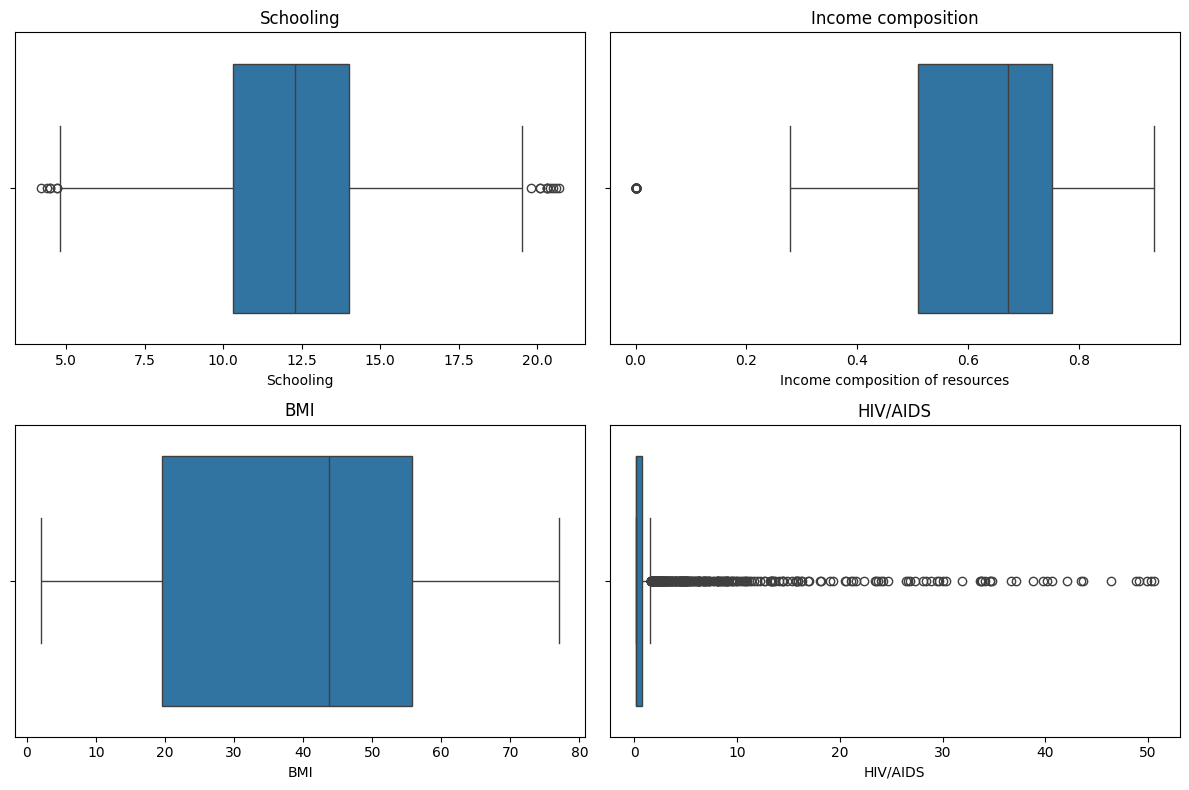

In [168]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(x=lifeExpectancy['Schooling'], ax=axs[0, 0])
axs[0, 0].set_title("Schooling")

sns.boxplot(x=lifeExpectancy['Income composition of resources'], ax=axs[0, 1])
axs[0, 1].set_title("Income composition")

sns.boxplot(x=lifeExpectancy['BMI'], ax=axs[1, 0])
axs[1, 0].set_title("BMI")

sns.boxplot(x=lifeExpectancy['HIV/AIDS'], ax=axs[1, 1])
axs[1, 1].set_title("HIV/AIDS")

plt.tight_layout()
plt.show()

### Gerando gráficos de disperção e histogramas dos principais atributos

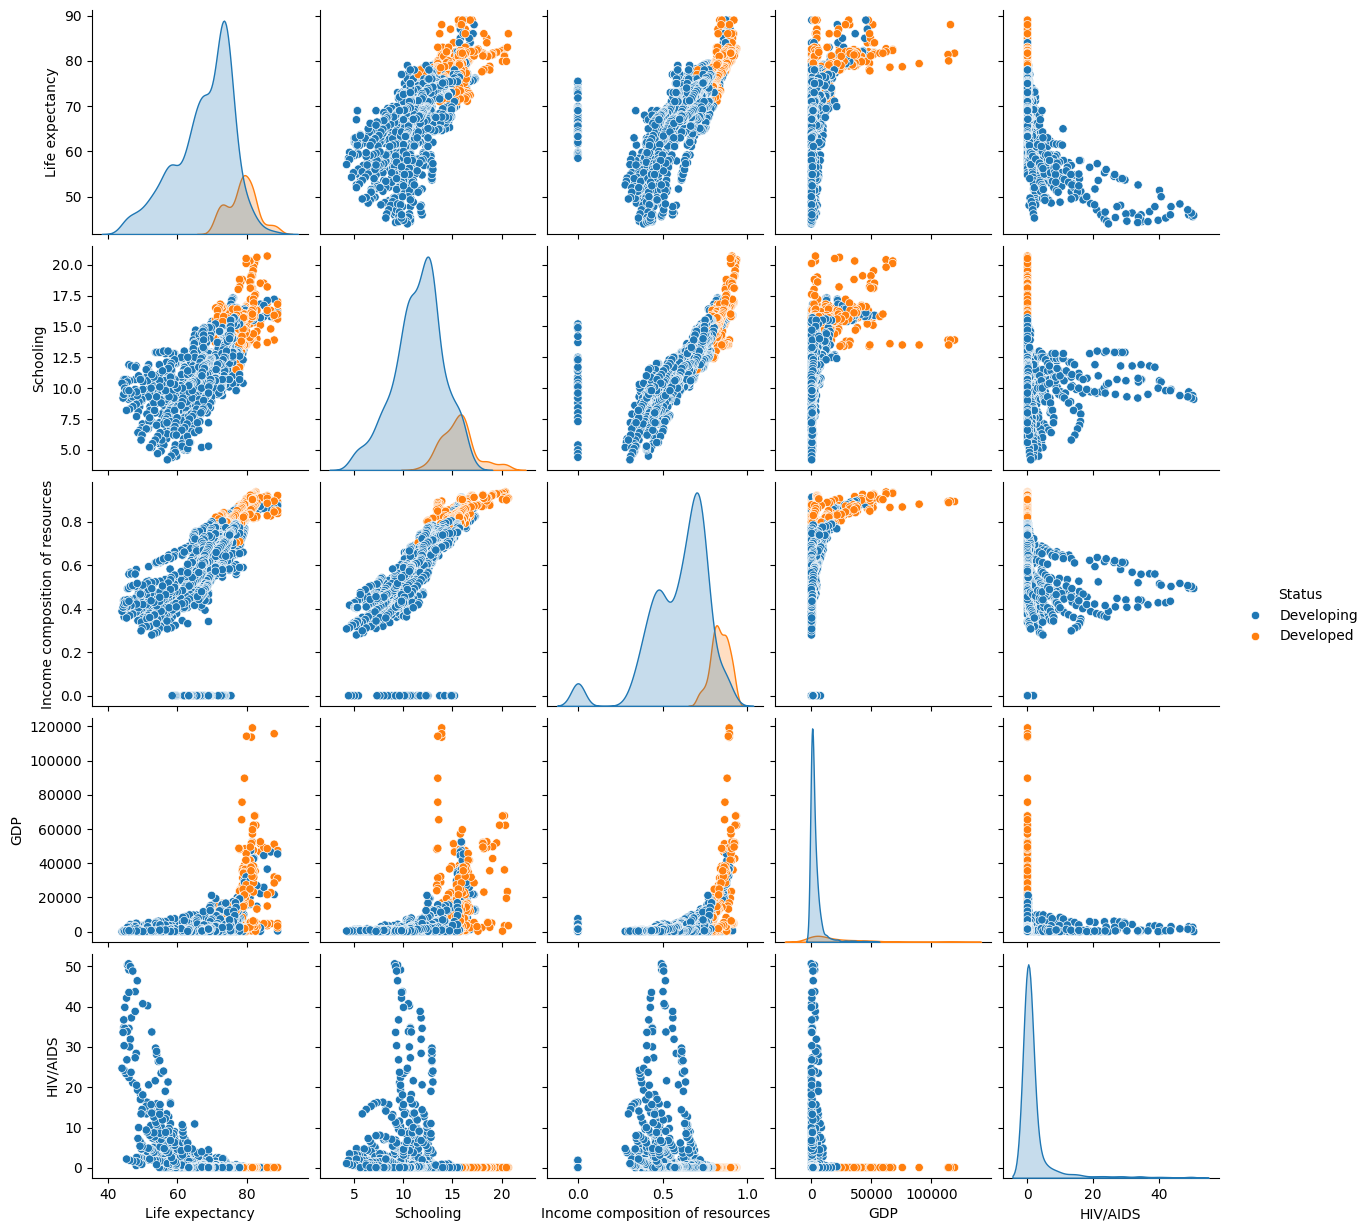

In [169]:
sns.pairplot(lifeExpectancy[['Life expectancy', 'Schooling', 'Income composition of resources', 'GDP', 'HIV/AIDS', 'Status']], hue='Status')

### Média da expectativa de vida global ao longo dos anos

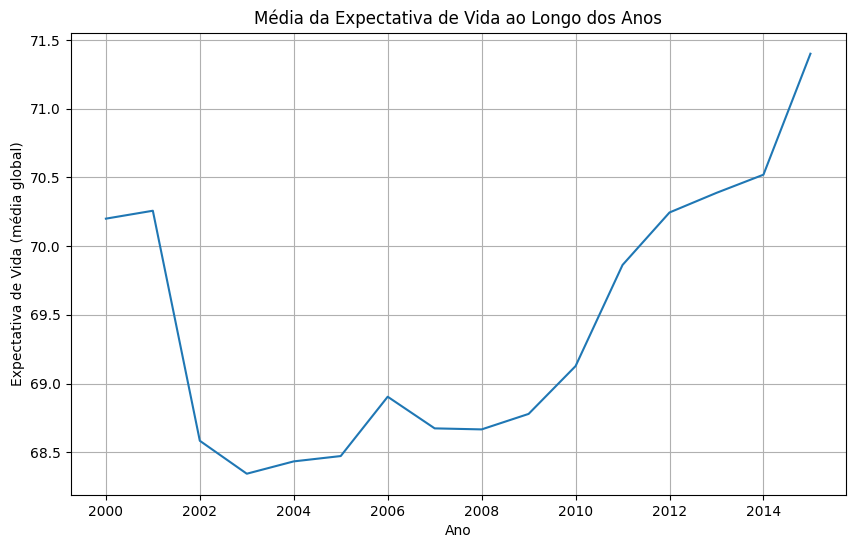

In [170]:
media_vida_ano = lifeExpectancy.groupby('Year')['Life expectancy'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=media_vida_ano, x='Year', y='Life expectancy')
plt.title('Média da Expectativa de Vida ao Longo dos Anos')
plt.ylabel('Expectativa de Vida (média global)')
plt.xlabel('Ano')
plt.grid(True)
plt.show()


## Seleção dos atributos

Usando um algorítmo RFE para selecionar os 5 atributos mais relevantes para a expectativa de vida

In [171]:
X = lifeExpectancy.drop(columns=['Life expectancy', 'Year']).select_dtypes(include=['number'])
y = lifeExpectancy['Life expectancy']

model = LinearRegression()
selector = RFE(estimator=model, n_features_to_select=5)
selector.fit(X, y)

selected_features = X.columns[selector.support_]
print("Atributos selecionados:", list(selected_features))

X_selected = X[selected_features]

Atributos selecionados: ['Total expenditure', 'HIV/AIDS', 'thinness  1-19 years', 'Income composition of resources', 'Schooling']


## Hold out do dataset

In [172]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.3, random_state=42
)

print(f"Tamanho treino: {X_train.shape[0]} amostras")
print(f"Tamanho teste: {X_test.shape[0]} amostras")


Tamanho treino: 1154 amostras
Tamanho teste: 495 amostras


## Treinamento do modelo

In [173]:
model = RandomForestRegressor(random_state=42)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

print(f'R2 médio Random Forest: {np.mean(scores):.4f}')
print(f'Desvio padrão do R2: {np.std(scores):.4f}')

R2 médio Random Forest: 0.9403
Desvio padrão do R2: 0.0173


## Teste do modelo